# Índices Educación Superior Periodo 2005-2023

## Introducción
La educación es uno de los pilares de la sociedad, y se ha visto afectada por diversas medidas e hitos como:

* Movilizaciones (2006, 2011)
* Implementación de ayudas económicas (Beca Vocación de Profesor, Gratuidad)
* Medidas de paridad
* Cambios en los sistemas de ingresos (PSU, PTU, PAES)

Se hace interesante comprender cómo afectaron estas medidas externas a la educación superior, por ejemplo en cantidad de matrículas de primer año y vacantes en cada carrera.
Se posee una base de datos histórica de educación superior que cuenta con registros entre 2005 y 2023.

## Exploración de datos

In [1]:
from typing import List
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
DATA_DIR = Path('../data').resolve()
assert DATA_DIR.exists()

In [3]:
df = pd.read_excel('../data/base_indices_2005-2023.xlsx', sheet_name='BaseINDICES_2005_2023')

Se puede observar que este dataset cuenta con 60 columnas, las cuales describen las características de cada carrera, como su nombre, institución, tipo de carrera, entre otras.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218773 entries, 0 to 218772
Data columns (total 60 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Año                                                 218773 non-null  int64  
 1   Cód. Institución                                    218773 non-null  int64  
 2   Nombre Institución                                  218773 non-null  object 
 3   Tipo Institución                                    218773 non-null  object 
 4   Clasificación1                                      218773 non-null  object 
 5   Clasificación2                                      218773 non-null  object 
 6   Clasificación3                                      218773 non-null  object 
 7   Clasificación4                                      218773 non-null  object 
 8   Clasificación5                                      218773 non-n

In [5]:
df.describe()

,Año,Cód. Institución,Orden Geográfico de la Región (Norte aSur),Cód. Carrera,idgenerocarrera,Año Inicio Actividades,Duración (en semestres),Cód. Campus,Cód. Sede,Máximo Puntaje (promedio matemáticas y lenguaje),...,Valor del Título,Vacantes,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total
count,218773.000000,218773.000000,218773.000000,218773.000000,2.187730e+05,218773.000000,218047.000000,1.035250e+05,2.187730e+05,40018.000000,...,1.820020e+05,1.603610e+05,197991.000000,197741.000000,157630.000000,218773.000000,215556.000000,215164.000000,166431.000000,218773.000000
mean,2014.907150,1671.081198,7.793297,18328.475397,8.562085e+05,2005.765213,6.490738,1.431034e+09,1.671086e+06,652.792069,...,1.614738e+05,4.473227e+02,15.603937,16.475824,0.584223,29.013567,45.751842,49.029275,1.548221,93.299534
std,5.207307,758.769099,2.942522,13057.761699,3.456971e+05,12.436666,2.599009,6.394409e+08,7.587712e+05,87.250824,...,2.391593e+05,6.596259e+04,25.240674,26.284474,2.254553,41.611269,86.541233,86.335418,6.703305,148.857924
min,2005.000000,1001.000000,1.000000,1000.000000,1.060100e+04,1833.000000,1.000000,0.000000e+00,1.001001e+06,266.000000,...,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,1028.000000,7.000000,7414.000000,1.004002e+06,2003.000000,4.000000,1.020001e+09,1.028001e+06,599.000000,...,1.700000e+03,2.200000e+01,1.000000,1.000000,0.000000,1.000000,6.000000,5.000000,0.000000,17.000000
50%,2015.000000,1054.000000,7.000000,15808.000000,1.008010e+06,2008.000000,6.000000,1.040001e+09,1.054001e+06,652.000000,...,8.600000e+04,3.000000e+01,8.000000,8.000000,0.000000,19.000000,19.000000,18.000000,0.000000,46.000000
75%,2019.000000,2029.000000,10.000000,28045.000000,1.009010e+06,2013.000000,8.000000,2.012004e+09,2.029007e+06,706.000000,...,2.100000e+05,5.000000e+01,20.000000,22.000000,0.000000,40.000000,52.000000,56.000000,1.000000,111.000000
max,2023.000000,4063.000000,16.000000,51341.000000,2.030005e+06,2023.000000,15.000000,4.045001e+09,4.063001e+06,1000.000000,...,7.198000e+06,1.078400e+07,860.000000,1203.000000,252.000000,1954.000000,4221.000000,2745.000000,967.000000,6048.000000


Para un posterior preprocesamiento de los datos, se observan la cantidad de registros únicos y nulos en cada una de estas columnas.

In [10]:
for col in df.columns:
    print(f"Columna: {col} - Valores únicos: {df[col].nunique()} - Porcentaje de nulos: {df[col].isnull().sum() / len(df) * 100:.2f}%")

Columna: Año - Valores únicos: 19 - Porcentaje de nulos: 0.00%
Columna: Cód. Institución - Valores únicos: 247 - Porcentaje de nulos: 0.00%
Columna: Nombre Institución - Valores únicos: 247 - Porcentaje de nulos: 0.00%
Columna: Tipo Institución - Valores únicos: 4 - Porcentaje de nulos: 0.00%
Columna: Clasificación1 - Valores únicos: 6 - Porcentaje de nulos: 0.00%
Columna: Clasificación2 - Valores únicos: 8 - Porcentaje de nulos: 0.00%
Columna: Clasificación3 - Valores únicos: 2 - Porcentaje de nulos: 0.00%
Columna: Clasificación4 - Valores únicos: 6 - Porcentaje de nulos: 0.00%
Columna: Clasificación5 - Valores únicos: 2 - Porcentaje de nulos: 0.00%
Columna: Clasificación6 - Valores únicos: 4 - Porcentaje de nulos: 0.00%
Columna: Nombre de la Sede - Valores únicos: 117 - Porcentaje de nulos: 0.00%
Columna: Comuna donde se imparte la carrera o programa - Valores únicos: 127 - Porcentaje de nulos: 0.00%
Columna: Nombre Region - Valores únicos: 16 - Porcentaje de nulos: 0.00%
Columna: Or

In [6]:
# Cast año a datetime
df['Año'] = pd.to_datetime(df['Año'], format='%Y')

### Distribuciones importantes

En primer lugar, se decide contabilizar el porcentaje de registros correspondientes a carreras de pregrado y postgrado, resultando en un 83.8% y 16.2% respectivamente.

Text(0.5, 1.0, 'Pregrado/Posgrado')

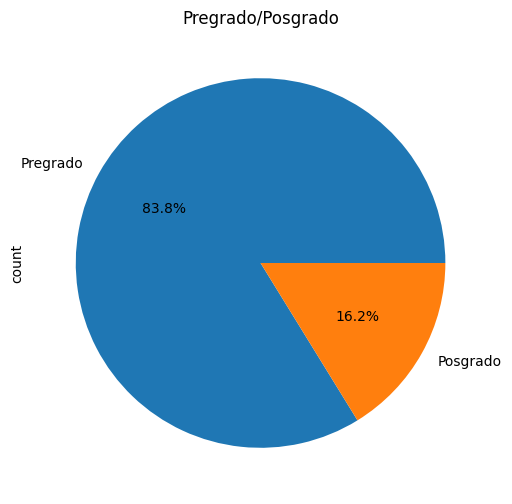

In [7]:
df['Pregrado/Posgrado'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Pregrado/Posgrado')

Por otra parte, la distribución de estudiantes por regiones es la siguiente:

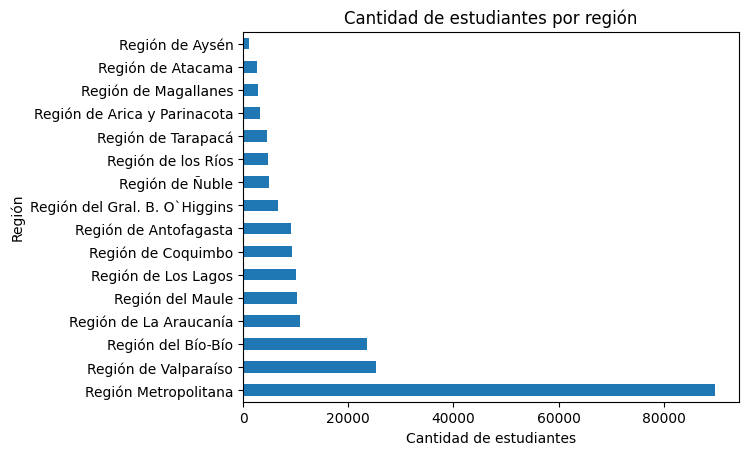

In [13]:
df['Nombre Region'].value_counts().plot(kind='barh')
plt.ylabel('Región')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por región')

Aunque pudiese ser predecible, se evidencia una alta cantidad de estudiantes en la Región Metropolitana, seguida por Valparaíso y Biobío. 

En cuanto a la cantidad de estudiantes por tipo de carrera, se observa que la mayoría de los estudiantes se encuentran en carreras de tipo técnicas, seguidas por profesional con licenciatura y carreras profesionales.

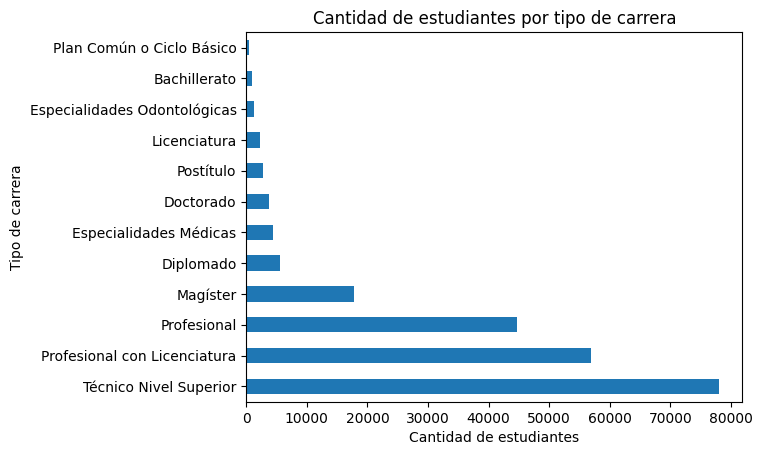

In [14]:
df['Tipo Carrera'].value_counts().plot(kind='barh')
plt.ylabel('Tipo de carrera')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por tipo de carrera')

Agrupando las carreras por sector de conocimiento, se puede observar una gran presencia de estudiantes en carreras tecnológicas, seguidas por el área de administración y comercio. En tercer puesto, encontramos el área de salud que es casi equiparada por el área de educación.

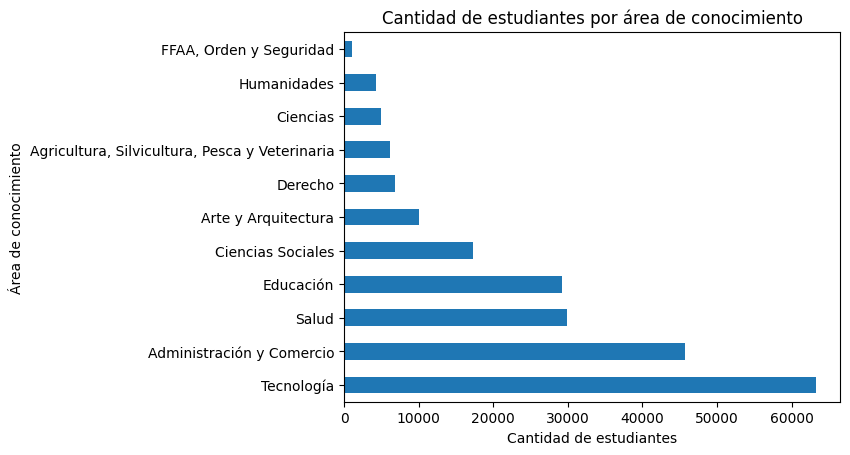

In [15]:
df['Area Conocimiento'].value_counts().plot(kind='barh')
plt.ylabel('Área de conocimiento')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por área de conocimiento')

Por el lado de las estadísticas relacionadas al ingreso a estas carreras, primero tenemos el promedio del puntaje obtenido en las pruebas de matemáticas y lenguaje. 
Cabe mencionar que los resultados registrados entre los años 2005 y 2019 corresponden a la prueba de selección universitaria PSU, con un puntaje mínimo de 150 puntos y un máximo de 850 puntos. Los siguientes 3 años corresponden a resultados de la prueba de transición universitaria PTU, mientras que el último año registrado corresponde a la nueva prueba de acceso a la educación superior PAES, cuyo rango de puntajes va desde los 100 hasta los 1.000 puntos.

In [39]:
df.groupby("Año")['Promedio Puntaje (promedio matemáticas y lenguaje)'].max()

Año
2005-01-01    791.0
2006-01-01    802.0
2007-01-01    791.0
2008-01-01    802.0
2009-01-01    799.0
2010-01-01    802.0
2011-01-01    805.0
2012-01-01    817.0
2013-01-01    784.0
2014-01-01    779.0
2015-01-01    789.0
2016-01-01    781.0
2017-01-01    787.0
2018-01-01    796.0
2019-01-01    786.0
2020-01-01    784.0
2021-01-01    784.0
2022-01-01    786.0
2023-01-01    961.0
Name: Promedio Puntaje (promedio matemáticas y lenguaje), dtype: float64

A continuación, se observa la distribución de los puntajes de matemáticas y lenguaje, donde se puede apreciar que en el caso de la PSU la mayoría de los estudiantes obtienen puntajes entre 400 y 700 puntos en ambas pruebas (recordar que la escala de cada una de las pruebas de la PSU estaba estandarizado, con una media de 500 puntos y una desviación estándar de 110).

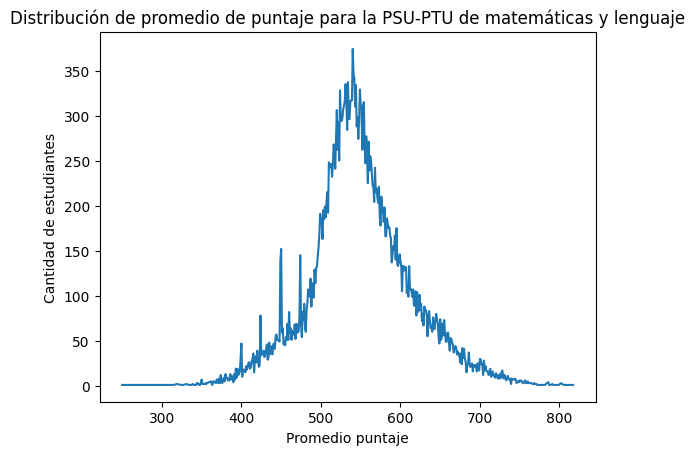

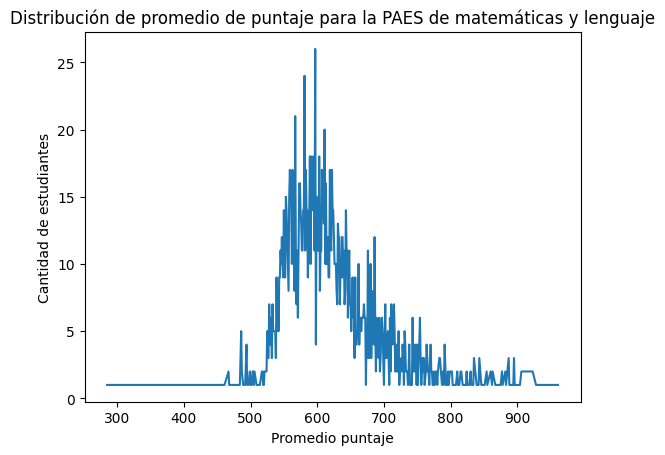

In [8]:
# Datos PSU y PTU
datos_puntaje_PSU_PTU=df[df['Año'].dt.year<2023]['Promedio Puntaje (promedio matemáticas y lenguaje)'].value_counts().sort_index().plot()
plt.xlabel("Promedio puntaje")
plt.ylabel("Cantidad de estudiantes")
plt.title("Distribución de promedio de puntaje para la PSU-PTU de matemáticas y lenguaje")
plt.show()

# Datos PAES
datos_puntaje_PAES=df[(df['Año'].dt.year>=2023)]['Promedio Puntaje (promedio matemáticas y lenguaje)'].value_counts().sort_index().plot()
plt.xlabel("Promedio puntaje")
plt.ylabel("Cantidad de estudiantes")
plt.title("Distribución de promedio de puntaje para la PAES de matemáticas y lenguaje")

plt.show()

## Preguntas de interés

#### 1. Evolución de total de estudiantes año

Considerando las distintas medidas implementadas en torno al acceso a la educación y los diferentes contextos nacionales e internacionales, se hace interesante observar la evolución de la cantidad de estudiantes en el tiempo.

<Axes: title={'center': 'Cantidad de estudiantes por año'}, xlabel='Año', ylabel='Cantidad de estudiantes'>

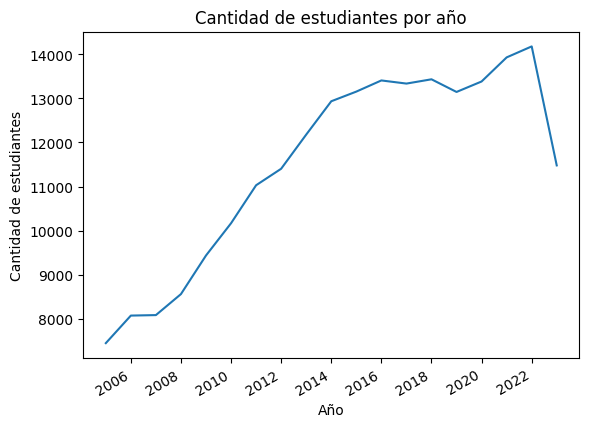

In [13]:
estudiantes_por_año = df.value_counts('Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por año')
estudiantes_por_año.plot()

#### 2. Efecto en la matrícula en educación superior (universidades) del ingreso de la gratuidad al sistema de becas

In [12]:
def calcular_matriculas_por_año(
    df: pd.DataFrame, columna_matricula: List[str] 
) -> pd.Series:
    """Calcula la cantidad de matriculas por año."""
    return df.groupby("Año")[columna_matricula].sum()

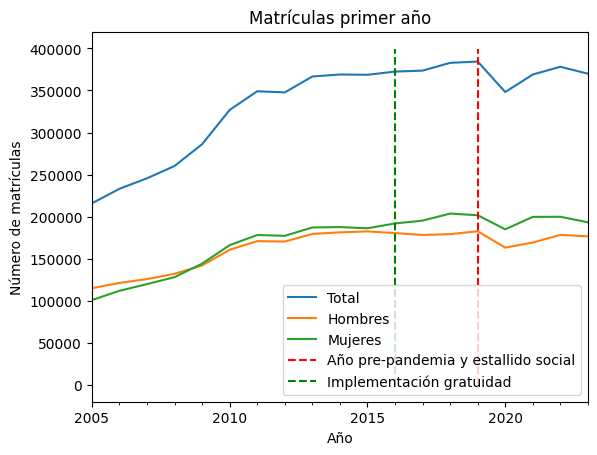

In [14]:
total_matriculas_por_año = calcular_matriculas_por_año(df, "Matrícula Primer Año")
hombres_por_año = calcular_matriculas_por_año(df, "Matrícula primer año hombres")
mujeres_por_año = calcular_matriculas_por_año(df, "Matrícula primer año mujeres")

total_matriculas_por_año.plot(label="Total")
hombres_por_año.plot(label="Hombres")
mujeres_por_año.plot(label="Mujeres")

plt.vlines(
    x="2019-01-01",
    ymin=0,
    ymax=total_matriculas_por_año.max() + 15000,
    color="red",
    linestyle="--",
    label="Año pre-pandemia y estallido social",
)
plt.vlines(
    x="2016-01-01",
    ymin=0,
    ymax=total_matriculas_por_año.max() + 15000,
    color="green",
    linestyle="--",
    label="Implementación gratuidad",
)
plt.xlabel("Año")
plt.ylabel("Número de matrículas")
plt.title("Matrículas primer año")
plt.legend()

Podemos ver que hay una clara disminución de matrículas de primer año en el año 2020, ¿a qué se debe esto?

#### 3. Influencia beca Vocación de Profesor

Considerando que la BVP aplica solo a algunas carreras relacionadas a pedagogia, primero se debe filtrar el dataset para obtener solo estas carreras. Luego, se puede observar la evolución de la cantidad de estudiantes en el tiempo.

Text(0.5, 1.0, 'Cantidad de carreras que aparecen en el dataset más de Threshold veces')

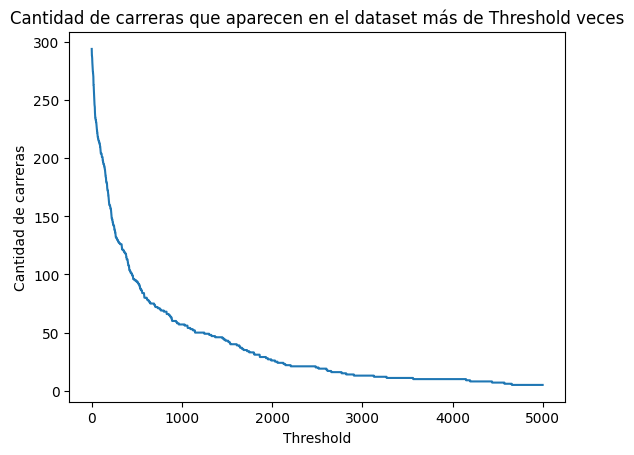

In [16]:
vc = df['Carrera Genérica'].value_counts()
max_threshold = 5000

values = [len(vc[vc > t]) for t in range(max_threshold)]  
pd.Series(values, index=range(max_threshold)).plot()

plt.ylabel('Cantidad de carreras')
plt.xlabel('Threshold')
plt.title('Cantidad de carreras que aparecen en el dataset más de Threshold veces')

In [17]:
threshold = 1000
carreras = vc[vc > threshold].index
carreras = df[df['Carrera Genérica'].isin(carreras)]
carreras['Carrera Genérica'].value_counts()

Carrera Genérica
Posgrado                                                                26753
Técnico en Administración de Empresas                                    7408
Técnico en Enfermería y Similares                                        5670
Diplomado                                                                5559
Ingeniería en Administración, Administración de Empresas y similares     5536
Ingeniería en Computación e Informática y similares                      4657
Trabajo Social, Servicio Social, Planificación Social y similares        4575
Técnico en Prevención de Riesgos                                         4438
Ingeniería en Prevención de Riesgos                                      4195
Contabilidad, Auditoría y similares                                      4150
Técnico en Educación Parvularia                                          3563
Ingeniería Comercial                                                     3269
Postítulo                                      

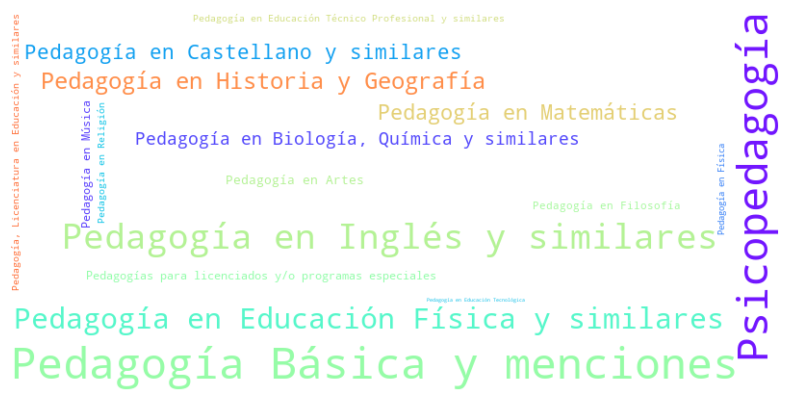

In [18]:
contains_pedagogia = (
    df["Carrera Genérica"]
    .str.lower()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
    .str.contains("pedagogia")
)
pedagogias = df.loc[contains_pedagogia, "Carrera Genérica"].value_counts()
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="rainbow",
    prefer_horizontal=0.5,
    contour_width=2,
    contour_color="steelblue",
    random_state=42,
)
wordcloud.generate_from_frequencies(pedagogias)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

Muchas carreras tienen el nombre pedagogía, por lo que para hacer un análisis general de la influencia de la beca vocación de profesor, se agruparán las carreras que contengan la palabra pedagogía en su nombre.

In [19]:
df.loc[contains_pedagogia, "Carrera Genérica"] = "Pedagogía"

In [20]:
df["Carrera Genérica"].value_counts().head()

Carrera Genérica
Posgrado                                 26753
Pedagogía                                12793
Técnico en Administración de Empresas     7408
Técnico en Enfermería y Similares         5670
Diplomado                                 5559
Name: count, dtype: int64

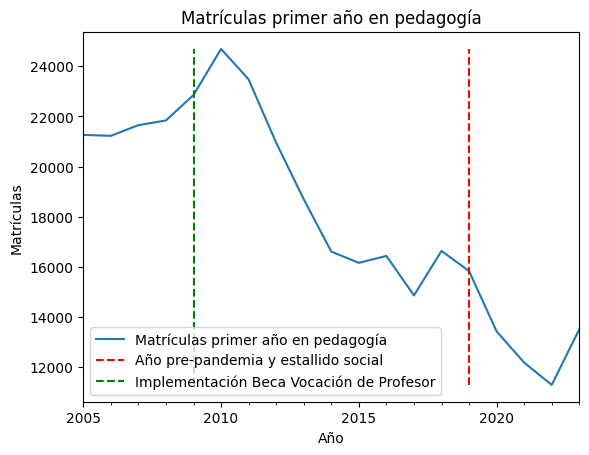

In [23]:
ano_beca = "2009-01-01"
total_matriculas_por_año_ped = calcular_matriculas_por_año(
    df[df["Carrera Genérica"] == "Pedagogía"], "Matrícula Primer Año"
)

total_matriculas_por_año_ped.plot(label="Matrículas primer año en pedagogía")

plt.vlines(
    x="2019-01-01",
    ymin=total_matriculas_por_año_ped.min(),
    ymax=total_matriculas_por_año_ped.max(),
    color="red",
    linestyle="--",
    label="Año pre-pandemia y estallido social",
)
plt.vlines(
    x=ano_beca,
    ymin=total_matriculas_por_año_ped.min(),
    ymax=total_matriculas_por_año_ped.max(),
    color="green",
    linestyle="--",
    label="Implementación Beca Vocación de Profesor",
)
plt.title("Matrículas primer año en pedagogía")
plt.ylabel("Matrículas")
plt.xlabel("Año")
plt.legend()

Podemos ver que hay una clara aumento de matrículas de primer año en el año 2010, a un año de la implementación de la beca. Por otro lado, esta disminuye drásticamente con el tiempo.



- ¿es posible que esta fuga de nuevos estudiantes se deba a un incremento en las matrículas de otras carreras?
- ¿que ha ocurrido con los puntajes de corte de las carreras de pedagogía?
- ¿a que área pertenecen las carreras que han abierto ultimamente?
- ¿que ha ocurrido con la distribucion de estudiantes por sexo?

#### 4. Influencia programas de motivación para mujeres en STEM

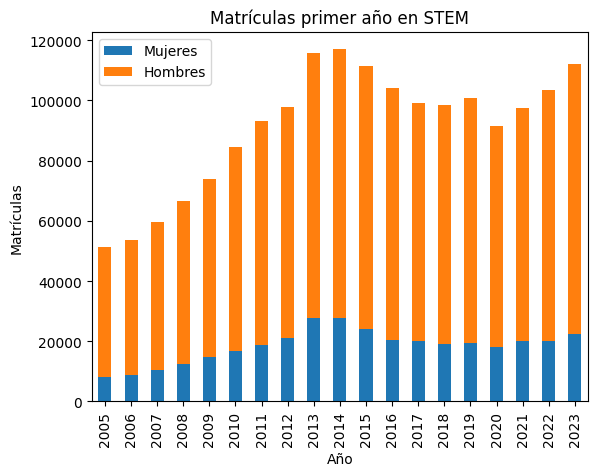

In [28]:
matriculas_stem = calcular_matriculas_por_año(
    df[df["Area Conocimiento"] == "Tecnología"],
    ["Matrícula primer año mujeres", "Matrícula primer año hombres"],
).copy()
matriculas_stem.index = matriculas_stem.index.year
ax = matriculas_stem.plot(kind="bar", stacked=True)

plt.xlabel("Año")
plt.ylabel("Matrículas")
plt.title("Matrículas primer año en STEM")
plt.legend(["Mujeres", "Hombres"])  # Agrega leyenda para las categorías
plt.show()

**TO DO:** Explicar gran diferencia, decir q sería interesante saber por qué y ver si los programas de motivación para mujeres en STEM han tenido algún efecto en esto.